<a href="https://colab.research.google.com/github/ifediM/Starter_ifedi/blob/master/PreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [4]:
df = pd.read_csv('/content/cardio_base.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


In [7]:
df.shape
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
smoke          0
dtype: int64

In [11]:
df.age.unique()
df['new_age']= round(df.age/365,1)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,new_age
0,0,18393,2,168,62.0,110,80,1,0,50.4
1,1,20228,1,156,85.0,140,90,3,0,55.4
2,2,18857,1,165,64.0,130,70,3,0,51.7
3,3,17623,2,169,82.0,150,100,1,0,48.3
4,4,17474,1,156,56.0,100,60,1,0,47.9


In [26]:
df2 = df.drop(['age','id'],axis=1)
df2.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,new_age
0,2,168,62.0,110,80,1,0,50.4
1,1,156,85.0,140,90,3,0,55.4
2,1,165,64.0,130,70,3,0,51.7
3,2,169,82.0,150,100,1,0,48.3
4,1,156,56.0,100,60,1,0,47.9


In [35]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df2)
    sse.append(km.inertia_)

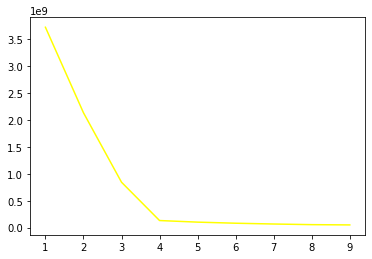

In [36]:
plt.plot(k_rng,sse,c='yellow')

In [38]:
km = KMeans(n_clusters=4)
yp = km.fit_predict(df2)

In [45]:
df2['cluster'] = yp
df2.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,new_age,cluster
0,2,168,62.0,110,80,1,0,50.4,0
1,1,156,85.0,140,90,3,0,55.4,0
2,1,165,64.0,130,70,3,0,51.7,0
3,2,169,82.0,150,100,1,0,48.3,0
4,1,156,56.0,100,60,1,0,47.9,0


In [48]:
input = df2.drop(['cholesterol','cluster'],axis='columns')

In [49]:
target = df['cholesterol']
target.head()

0    1
1    3
2    3
3    1
4    1
Name: cholesterol, dtype: int64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(input,target,train_size=0.3)

In [53]:
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
model.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])

In [55]:
model.score(X_test,y_test)

0.7442729600664406

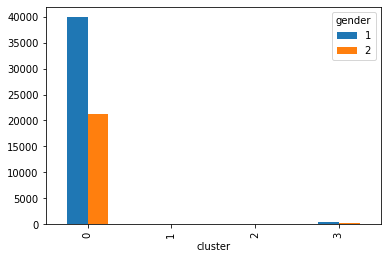

In [58]:
pd.crosstab(df2.cluster,df2.gender).plot(kind='bar')

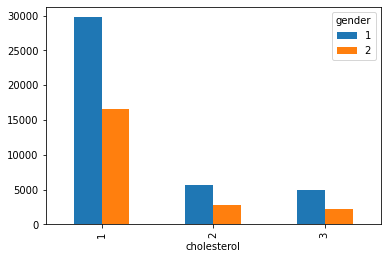

In [59]:
pd.crosstab(df2.cholesterol,df2.gender).plot(kind='bar')